In [1]:
from fastai.collab import *
from fastai.tabular import *

In [2]:
user,item,title = 'userId','movieId','title'

In [5]:
path = untar_data(URLs.ML_SAMPLE, dest='/data')

In [6]:
path

PosixPath('/data/movie_lens_sample')

In [7]:
ratings = pd.read_csv(path/'ratings.csv')

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [9]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [10]:
y_range = [0, 5.5]

In [11]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [12]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss
1,1.622662,0.963443
2,0.854940,0.675948
3,0.650239,0.671767


### Full Dataset

In [14]:
path = '/data/ml-100k'

In [17]:
ratings = pd.read_csv(path+'/u.data', delimiter='\t', header=None, names=['user', 'item', 'rating','timestamp'])

In [18]:
ratings.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [21]:
movies = pd.read_csv(path+'/u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=['item', 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

In [26]:
len(movies)

1682

In [28]:
rating_movie = ratings.merge(movies[['item', 'title']])
rating_movie.head()

,user,item,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [30]:
data = CollabDataBunch.from_df(rating_movie, seed=42, pct_val=0.1, item_name=title)

In [31]:
data.show_batch()

user,title,target
485,Kolya (1996),5.0
709,Glory (1989),4.0
554,Star Trek: The Wrath of Khan (1982),5.0
786,"English Patient, The (1996)",4.0
194,To Kill a Mockingbird (1962),4.0


In [32]:
y_range = [0,5.5]

In [33]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-01


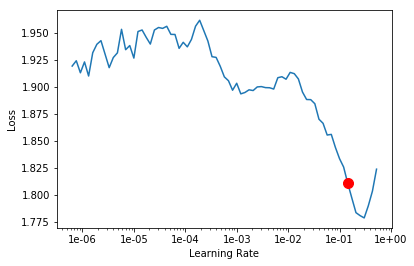

In [34]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [35]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss
1,0.969218,0.950165
2,0.877039,0.888152
3,0.770154,0.833314
4,0.660415,0.812774
5,0.563021,0.810156
